<style>
body {
    max-width: 900px;
    margin: 40px auto;
    padding: 0 20px;
    font-family: "Georgia", serif;
    line-height: 1.6;
}
</style>

<div style="text-align: center; padding: 60px 60px">
  <h1 style="font-weight: bold; font-size: 3.1em">
    GA-UFLP
  </h1>
</div>

En esta Notebook se resuelven para todas las instancias.

In [7]:
from cargar_datos import *
from ga2 import *
from graficas import *
import random

In [8]:
random_seed = [2, 3, 5, 7, 11, 13, 17, 19, 23]

objetivos = {"UFLP-1": 23468,
            "UFLP-2": 22119,
            "UFLP-3": 25038,
            "UFLP-4": 21864,
            "UFLP-5": 23976,
            "UFLP-6": 257964,
            "UFLP-7": 257961,
            "UFLP-8": 257626,
            "UFLP-9": 257573,
            "UFLP-10": 257896}

path = "resultados-totales"

In [9]:
configuraciones = [
    # Mejor resultado
    {
        "tamaño_de_poblacion": 300,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 120,
        "maximo_de_generaciones": 1000,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "mejor"
    },
    # Pues
    {   
        "tamaño_de_poblacion": random.randint(100, 300),
        "tasa_de_mutacion": round(random.uniform(0.5, 1), 2),
        "tasa_de_crossover": round(random.uniform(0.5, 1), 2),
        "tamaño_del_torneo": random.randint(10, 50),
        "maximo_de_generaciones": 1000,
        "tipo_de_crossover": "uniforme",
        "tipo_de_mutacion": "mejor"
    },
    {   
        "tamaño_de_poblacion": random.randint(100, 300),
        "tasa_de_mutacion": round(random.uniform(0.5, 1), 2),
        "tasa_de_crossover": round(random.uniform(0.5, 1), 2),
        "tamaño_del_torneo": random.randint(10, 50),
        "maximo_de_generaciones": 1000,
        "tipo_de_crossover": "un punto",
        "tipo_de_mutacion": "random"
    },
    # Solucion mas rapida
    {
        "tamaño_de_poblacion": 100,
        "tasa_de_mutacion": 1,
        "tasa_de_crossover": 0.8,
        "tamaño_del_torneo": 40,
        "maximo_de_generaciones": 1000,
        "tipo_de_crossover": "uniforme",
        "tipo_de_mutacion": "random"
    }
]

In [10]:
def ejecucion(n_instalaciones, n_clientes, costos_fijos, costos_de_transporte, fitness_objetivo, configuraciones, random_seed, path, file_name):

    resultados = {}

    for config in configuraciones:
        nombre_configuracion = f"N={config['tamaño_de_poblacion']}, M={config['tasa_de_mutacion']}, C={config['tasa_de_crossover']}, T={config['tamaño_del_torneo']}, G={config['maximo_de_generaciones']}, tc={config['tipo_de_crossover']}, tm={config['tipo_de_mutacion']}"
        print(f"--- Ejecutando configuracion: {nombre_configuracion} ---")
        resultados[nombre_configuracion] = []

        for ejecucion in range(len(random_seed)):
            ga = UFLP_GA(n_instalaciones, n_clientes, costos_fijos, costos_de_transporte,
                        config["tamaño_de_poblacion"], config["tasa_de_mutacion"], config["tasa_de_crossover"],
                        config["tamaño_del_torneo"], config["maximo_de_generaciones"], config["tipo_de_crossover"],
                        config["tipo_de_mutacion"], random_seed[ejecucion], fitness_objetivo)

            mejor_solucion, mejor_fitness, historial_de_fitnesses, tiempo_de_ejecucion, num_generaciones, generacion_opti = ga.run()
            resultados[nombre_configuracion].append({
                "mejor_solucion": mejor_solucion,
                "mejor_costo": mejor_fitness,
                "tiempo_de_ejecucion": tiempo_de_ejecucion,
                "num_generaciones": num_generaciones,
                "historial_de_fitnesses": historial_de_fitnesses,
                "generacion_optima": generacion_opti
            })
            print(f"Seed {random_seed[ejecucion]}: Mejor Costo = {mejor_fitness:.0f}, Tiempo = {tiempo_de_ejecucion:.5f}s, Generación Óptima = {generacion_opti}")

            with open(os.path.join(path, file_name, f"{nombre_configuracion}.txt"), "a") as f:
                f.write(f"Seed {random_seed[ejecucion]}: Mejor Costo = {mejor_fitness:.0f}, Tiempo = {tiempo_de_ejecucion:.5f}s, Generación Óptima = {generacion_opti}\n")
       
        print("\n")
        
    return resultados

In [11]:
def todo(n_instalaciones, n_clientes, costos_fijos, costos_de_transporte, fitness_objetivo, configuraciones, random_seed, path, file_name):
    resultados = ejecucion(n_instalaciones, n_clientes, costos_fijos, costos_de_transporte, fitness_objetivo, configuraciones, random_seed, path, file_name)
    tablas_resumen = resumen(resultados, fitness_objetivo, random_seed, path, file_name)
    curva_corvengencia_individual(resultados, path, file_name)
    guardar_resultados(resultados, path, file_name, random_seed)
    box_plot_costos(resultados, path, file_name)
    curva_convergencia_comparacion(resultados, path, file_name, show=True, alphaa=0.15)
    box_plot_costos_comparacion(resultados, path, file_name, show=True)
    resumen_tablas(resultados, path, file_name, len(random_seed), tablas_resumen, random_seed, show=True)


Ejecutando para UFLP-1

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=120, G=1000, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 23468, Tiempo = 0.05148s, Generación Óptima = 3
Seed 3: Mejor Costo = 23468, Tiempo = 0.02759s, Generación Óptima = 2
Seed 5: Mejor Costo = 23468, Tiempo = 0.05061s, Generación Óptima = 4
Seed 7: Mejor Costo = 23468, Tiempo = 0.09561s, Generación Óptima = 6
Seed 11: Mejor Costo = 23468, Tiempo = 0.03086s, Generación Óptima = 2
Seed 13: Mejor Costo = 23468, Tiempo = 0.07273s, Generación Óptima = 5
Seed 17: Mejor Costo = 23468, Tiempo = 0.05670s, Generación Óptima = 4
Seed 19: Mejor Costo = 23468, Tiempo = 0.04430s, Generación Óptima = 3
Seed 23: Mejor Costo = 23468, Tiempo = 0.05810s, Generación Óptima = 4


--- Ejecutando configuracion: N=177, M=0.71, C=0.51, T=18, G=1000, tc=uniforme, tm=mejor ---
Seed 2: Mejor Costo = 23468, Tiempo = 0.02333s, Generación Óptima = 6
Seed 3: Mejor Costo = 23468, Tiempo = 0.01693s, Generación Óptima = 4
Seed 5: Mejor Co

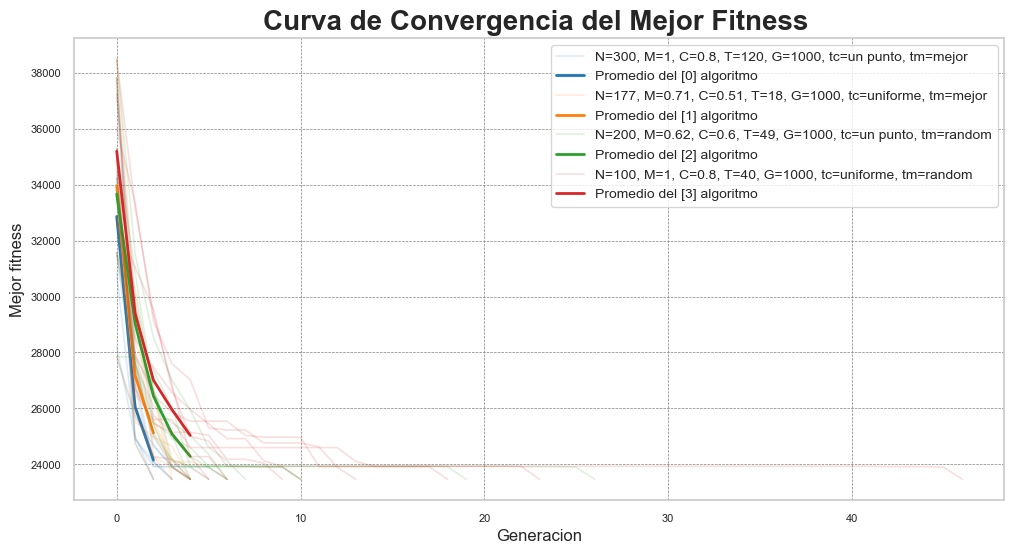

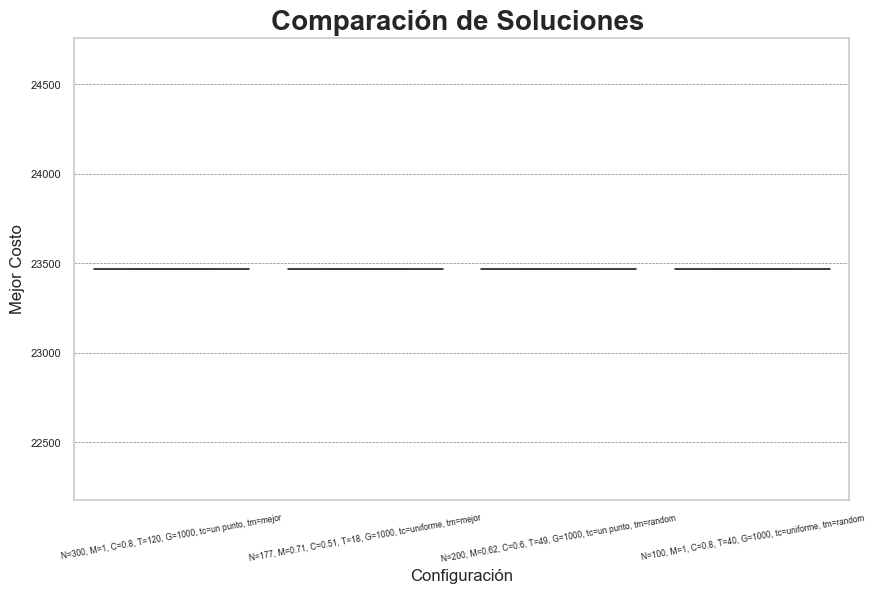

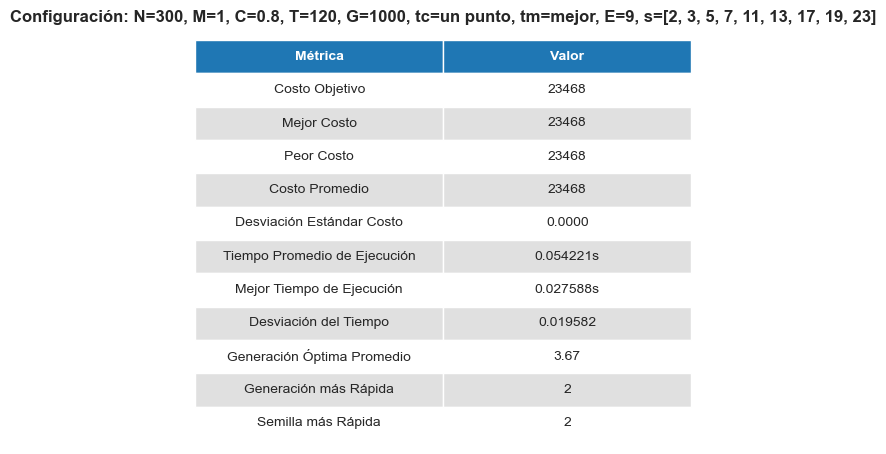

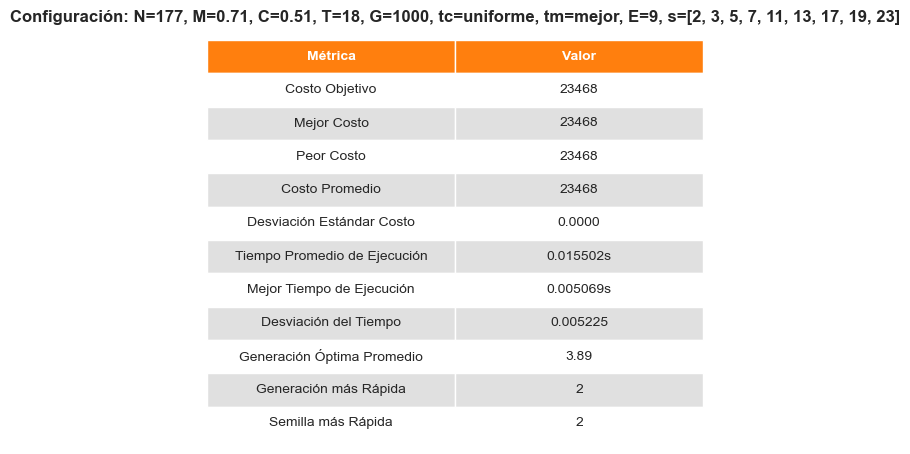

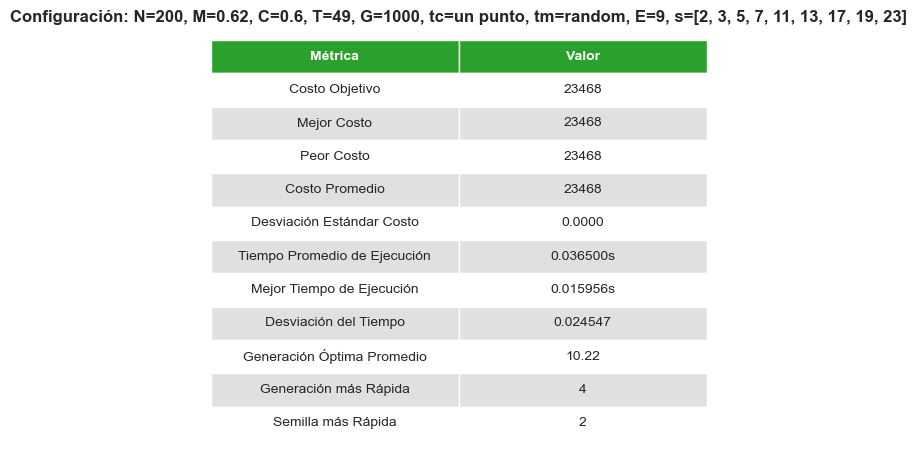

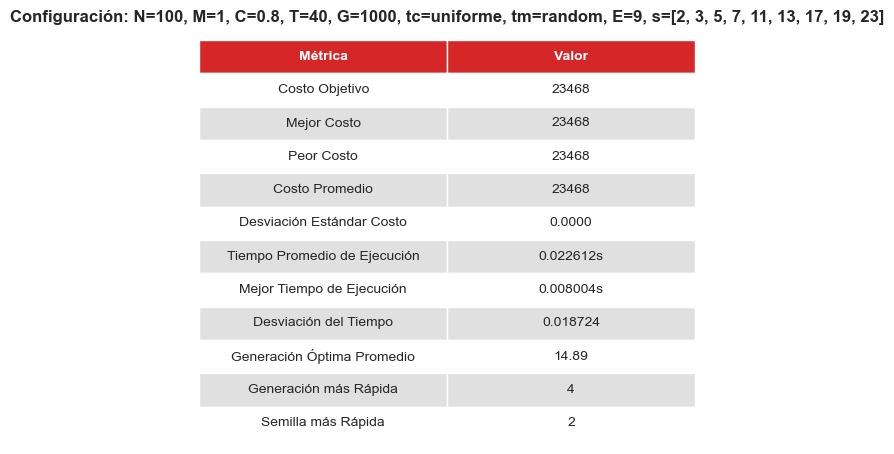

Ejecutando para UFLP-2

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=120, G=1000, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 22119, Tiempo = 0.03027s, Generación Óptima = 3
Seed 3: Mejor Costo = 22119, Tiempo = 0.06354s, Generación Óptima = 4
Seed 5: Mejor Costo = 22119, Tiempo = 0.05410s, Generación Óptima = 4
Seed 7: Mejor Costo = 22119, Tiempo = 0.06015s, Generación Óptima = 4
Seed 11: Mejor Costo = 22119, Tiempo = 0.04545s, Generación Óptima = 3
Seed 13: Mejor Costo = 22119, Tiempo = 0.04659s, Generación Óptima = 3
Seed 17: Mejor Costo = 22119, Tiempo = 0.04397s, Generación Óptima = 3
Seed 19: Mejor Costo = 22119, Tiempo = 0.03257s, Generación Óptima = 3
Seed 23: Mejor Costo = 22119, Tiempo = 0.07437s, Generación Óptima = 5


--- Ejecutando configuracion: N=177, M=0.71, C=0.51, T=18, G=1000, tc=uniforme, tm=mejor ---
Seed 2: Mejor Costo = 22119, Tiempo = 0.00292s, Generación Óptima = 4
Seed 3: Mejor Costo = 22119, Tiempo = 0.02333s, Generación Óptima = 5
Seed 5: Mejor Co

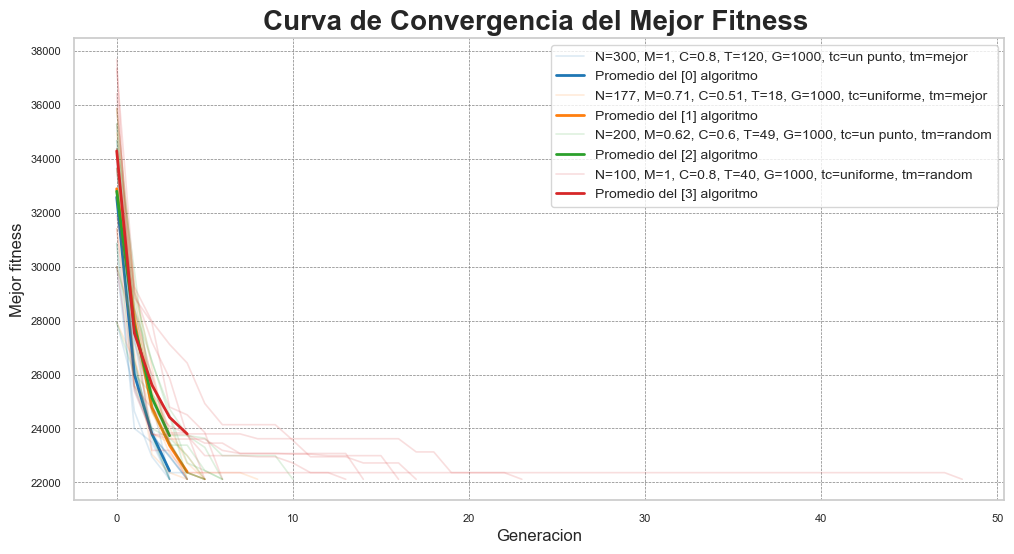

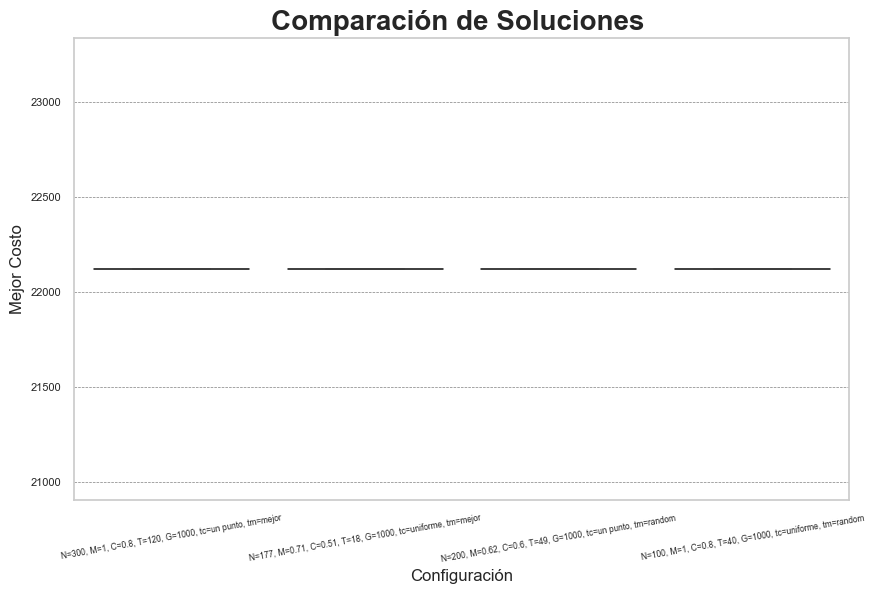

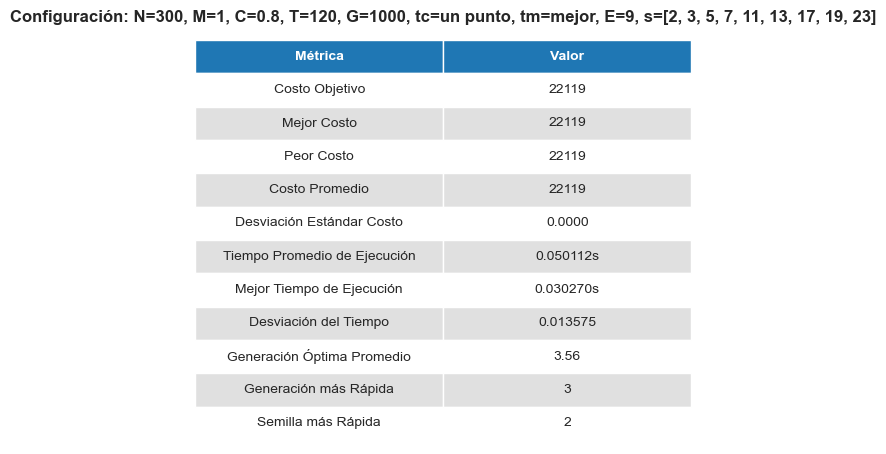

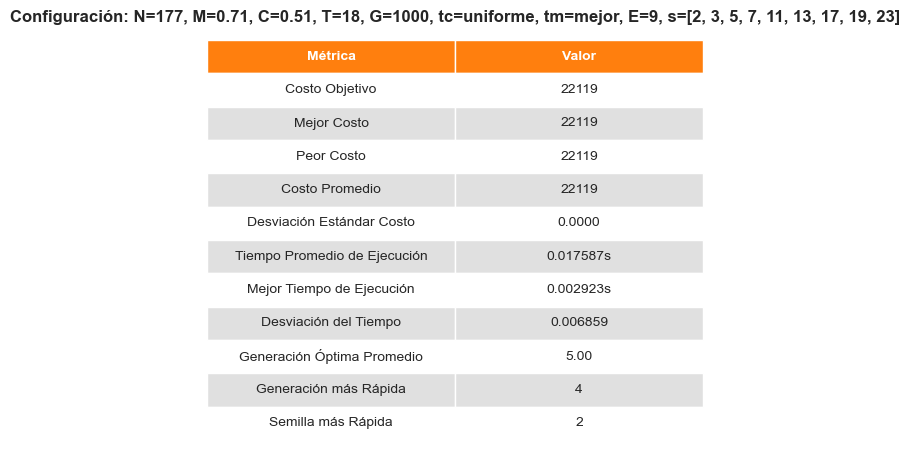

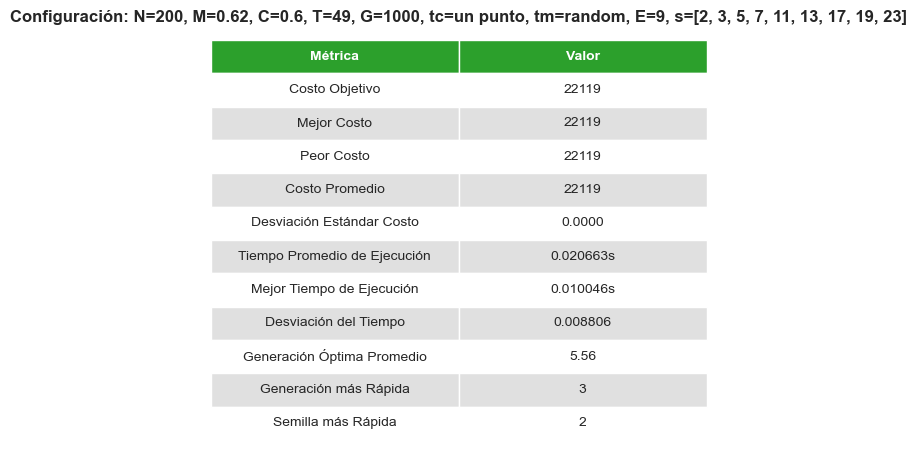

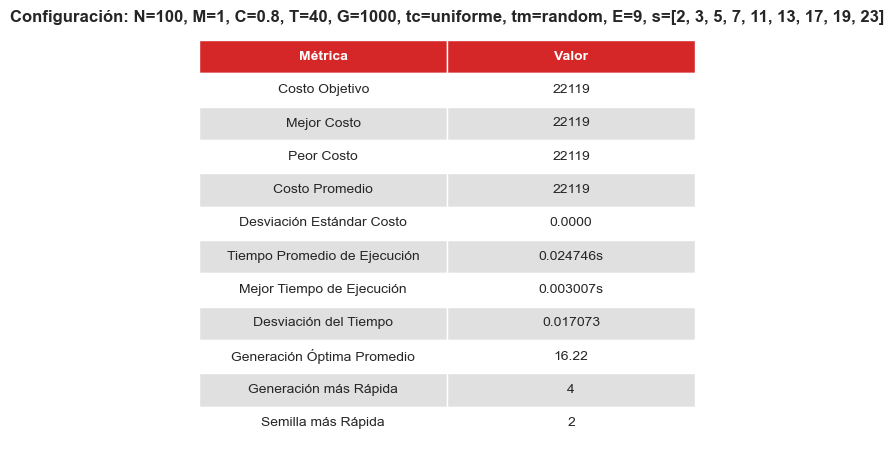

Ejecutando para UFLP-3

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=120, G=1000, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 25038, Tiempo = 0.02864s, Generación Óptima = 2
Seed 3: Mejor Costo = 25132, Tiempo = 13.20713s, Generación Óptima = None
Seed 5: Mejor Costo = 25038, Tiempo = 0.04442s, Generación Óptima = 3
Seed 7: Mejor Costo = 25038, Tiempo = 0.04248s, Generación Óptima = 3
Seed 11: Mejor Costo = 25132, Tiempo = 13.17188s, Generación Óptima = None
Seed 13: Mejor Costo = 25038, Tiempo = 0.05485s, Generación Óptima = 4
Seed 17: Mejor Costo = 25038, Tiempo = 0.03163s, Generación Óptima = 2
Seed 19: Mejor Costo = 25038, Tiempo = 0.02980s, Generación Óptima = 2
Seed 23: Mejor Costo = 25038, Tiempo = 0.03876s, Generación Óptima = 3


--- Ejecutando configuracion: N=177, M=0.71, C=0.51, T=18, G=1000, tc=uniforme, tm=mejor ---
Seed 2: Mejor Costo = 25038, Tiempo = 0.01760s, Generación Óptima = 3
Seed 3: Mejor Costo = 25038, Tiempo = 0.01053s, Generación Óptima = 3
Seed 5: 

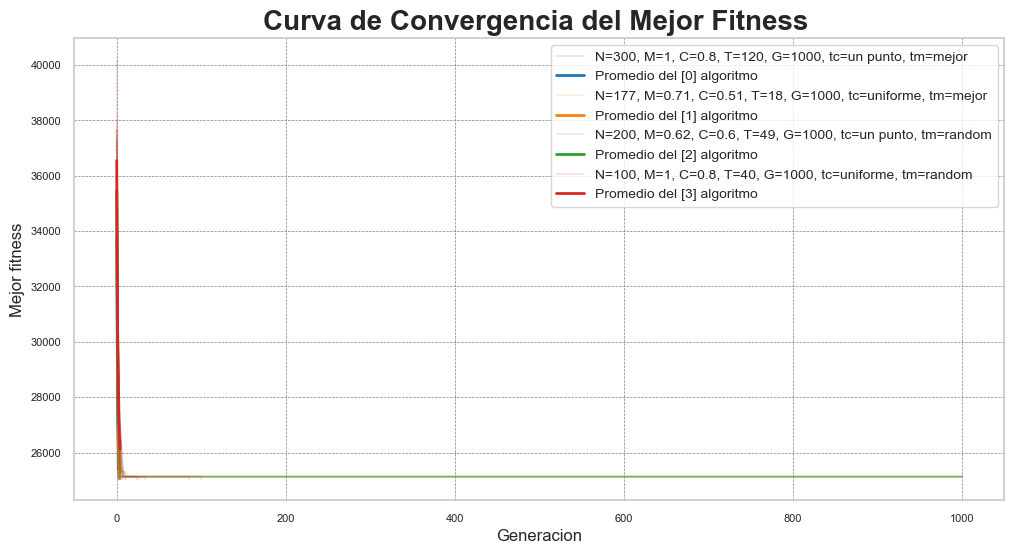

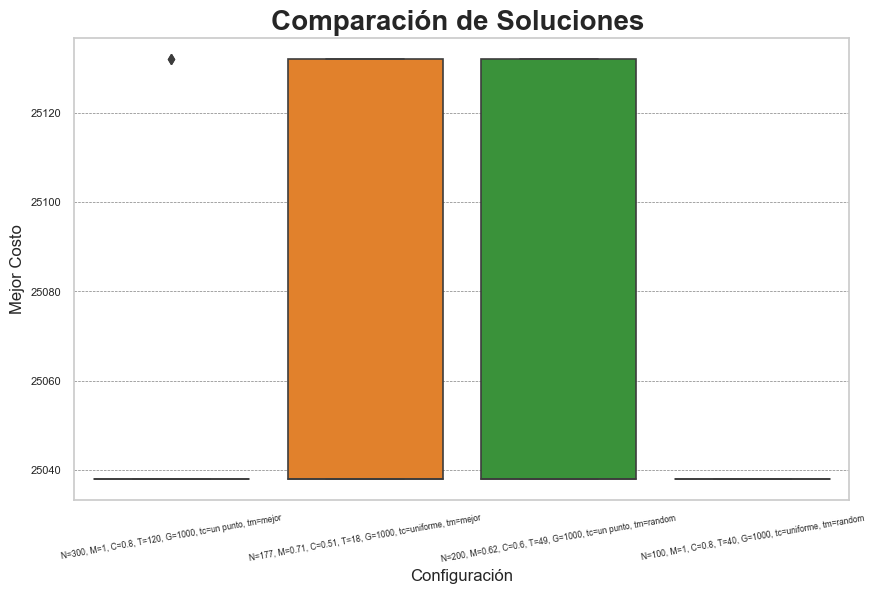

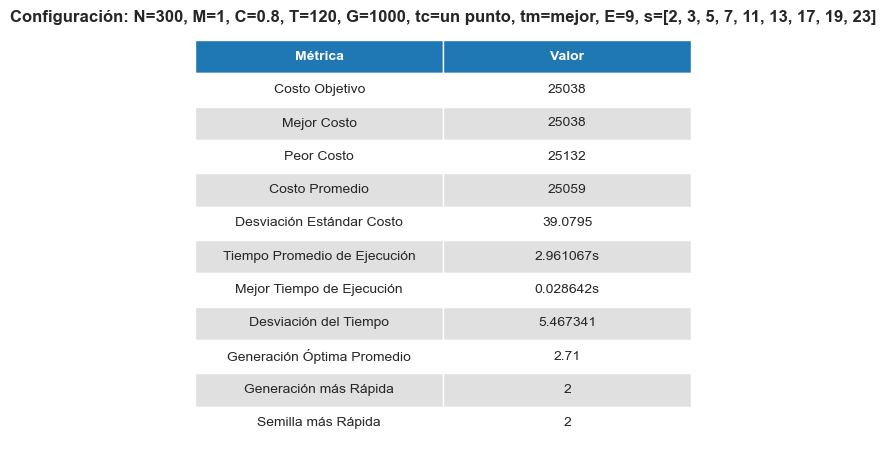

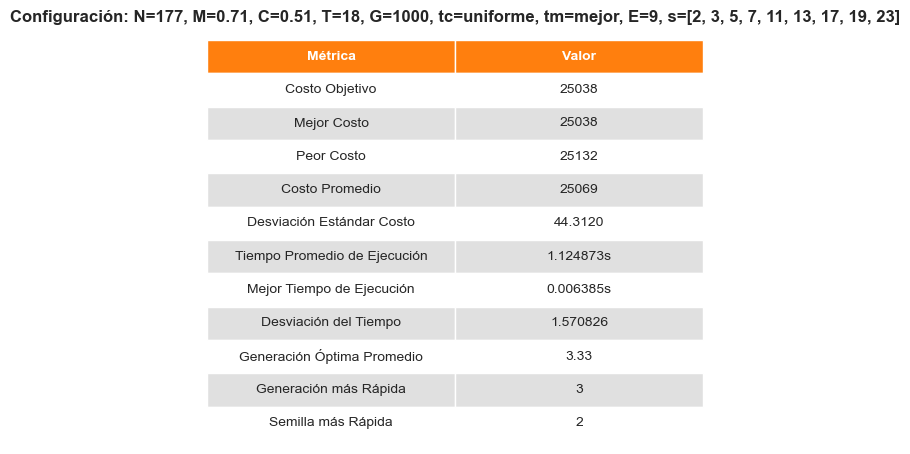

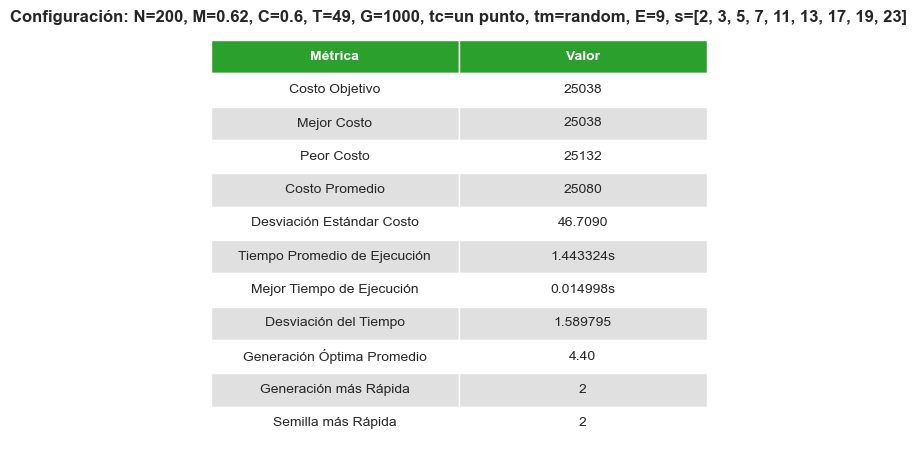

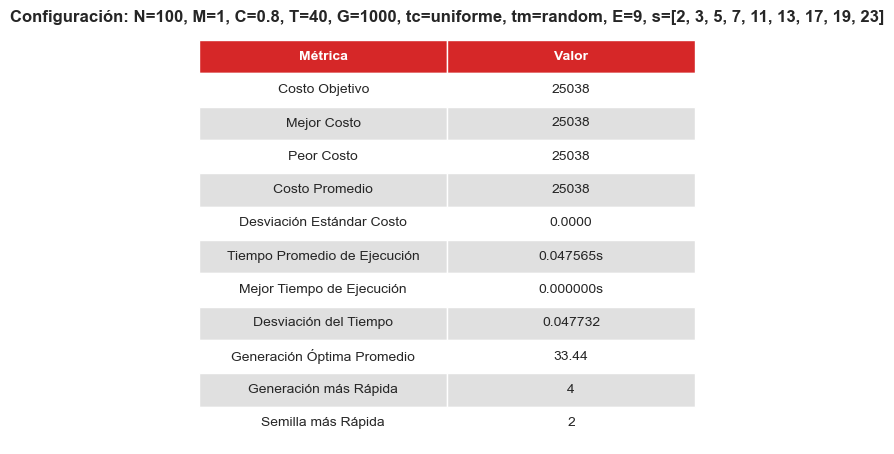

Ejecutando para UFLP-4

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=120, G=1000, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 21864, Tiempo = 0.08963s, Generación Óptima = 7
Seed 3: Mejor Costo = 21864, Tiempo = 0.06311s, Generación Óptima = 5
Seed 5: Mejor Costo = 21864, Tiempo = 0.03167s, Generación Óptima = 2
Seed 7: Mejor Costo = 21864, Tiempo = 0.07488s, Generación Óptima = 4
Seed 11: Mejor Costo = 21864, Tiempo = 0.09641s, Generación Óptima = 7
Seed 13: Mejor Costo = 21864, Tiempo = 0.03242s, Generación Óptima = 3
Seed 17: Mejor Costo = 21864, Tiempo = 0.06383s, Generación Óptima = 4
Seed 19: Mejor Costo = 21864, Tiempo = 0.04884s, Generación Óptima = 3
Seed 23: Mejor Costo = 21864, Tiempo = 0.05444s, Generación Óptima = 5


--- Ejecutando configuracion: N=177, M=0.71, C=0.51, T=18, G=1000, tc=uniforme, tm=mejor ---
Seed 2: Mejor Costo = 21864, Tiempo = 0.03251s, Generación Óptima = 8
Seed 3: Mejor Costo = 21864, Tiempo = 0.03113s, Generación Óptima = 6
Seed 5: Mejor Co

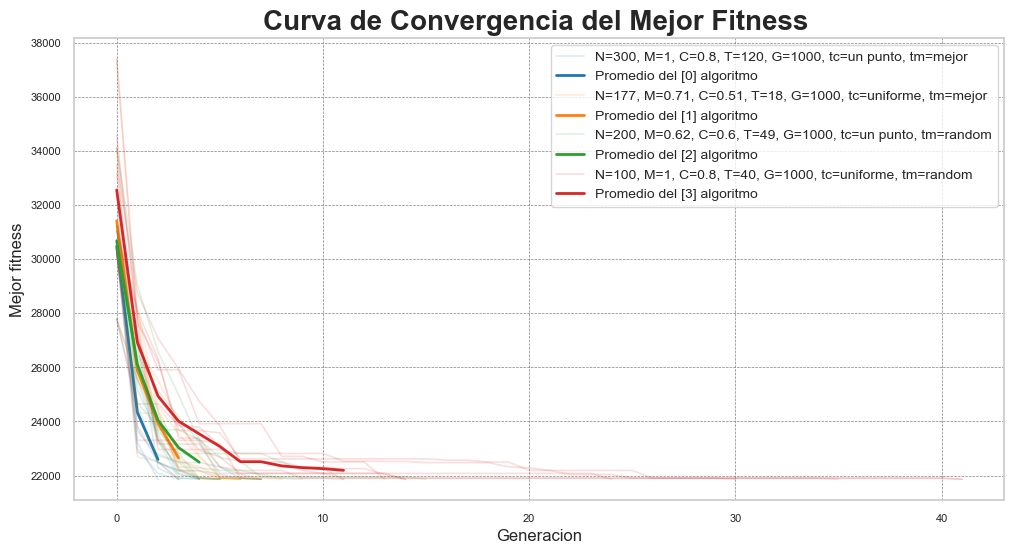

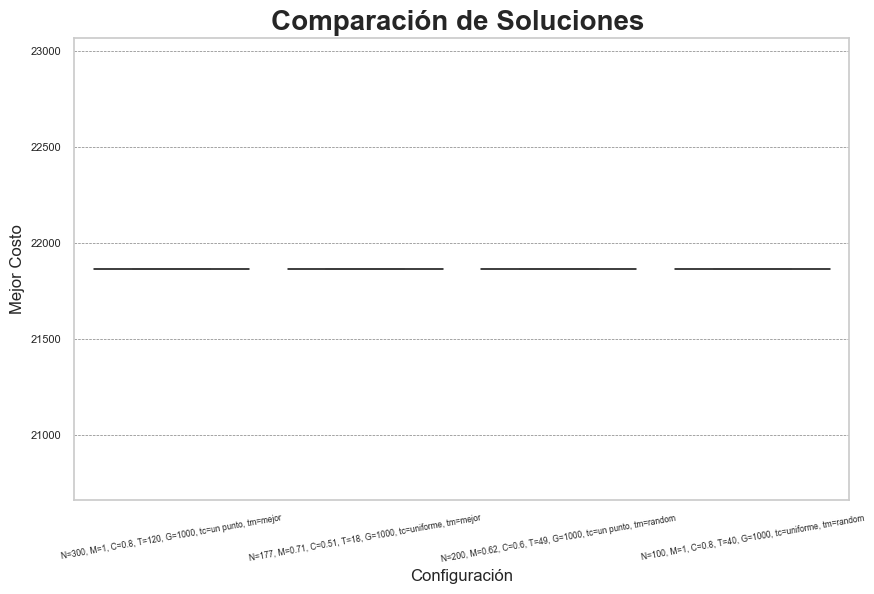

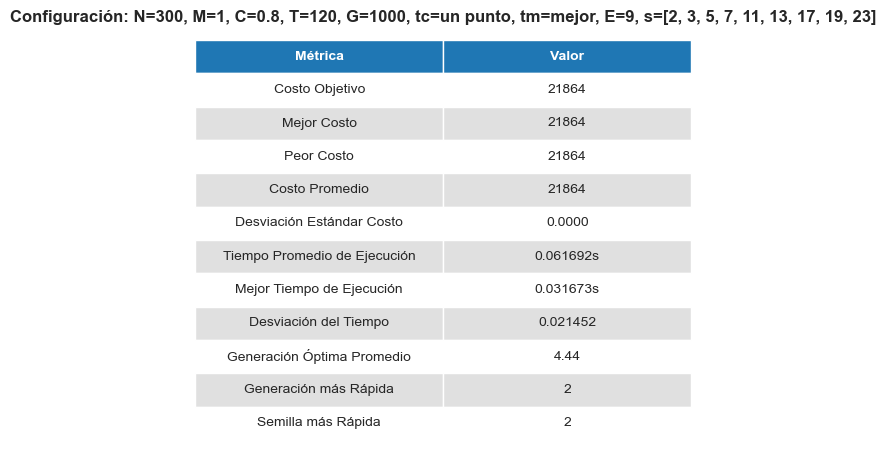

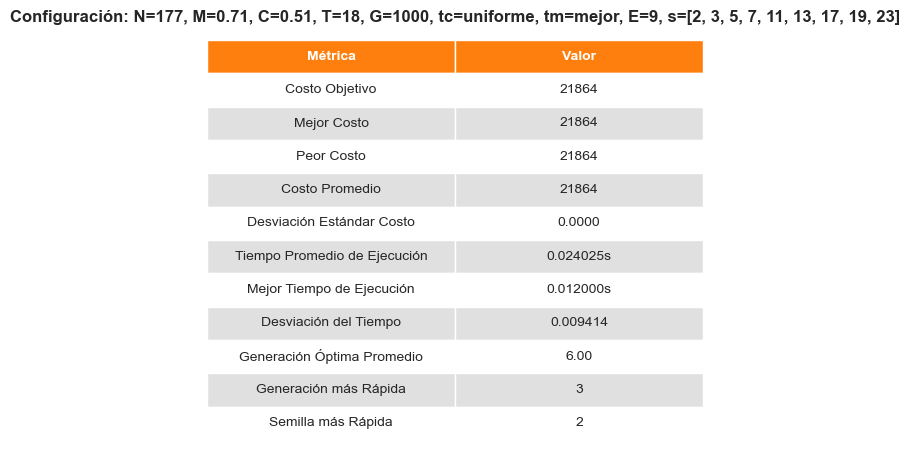

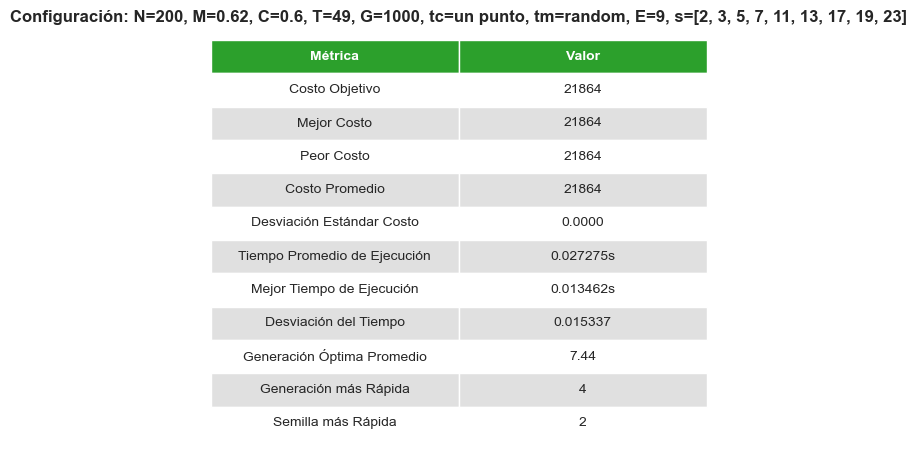

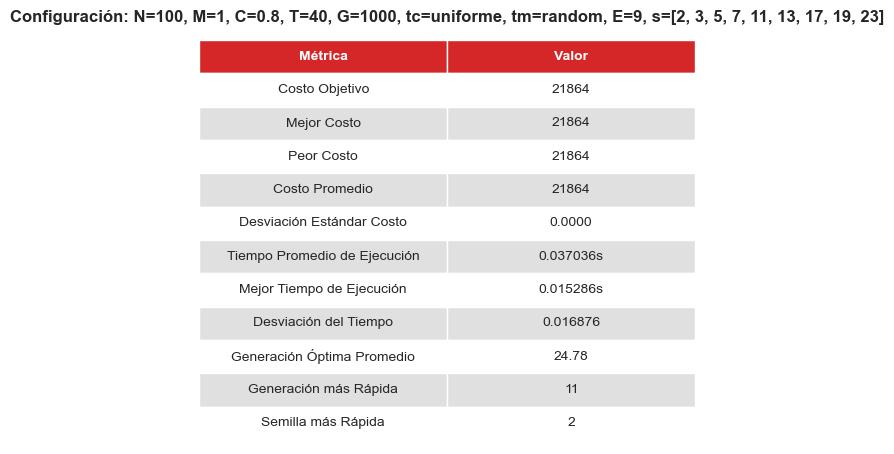

Ejecutando para UFLP-5

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=120, G=1000, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 23976, Tiempo = 0.06778s, Generación Óptima = 5
Seed 3: Mejor Costo = 23976, Tiempo = 0.04958s, Generación Óptima = 3
Seed 5: Mejor Costo = 23976, Tiempo = 0.05033s, Generación Óptima = 4
Seed 7: Mejor Costo = 23976, Tiempo = 0.05626s, Generación Óptima = 3
Seed 11: Mejor Costo = 23976, Tiempo = 0.05671s, Generación Óptima = 4
Seed 13: Mejor Costo = 23976, Tiempo = 0.04350s, Generación Óptima = 3
Seed 17: Mejor Costo = 23976, Tiempo = 0.06990s, Generación Óptima = 5
Seed 19: Mejor Costo = 23976, Tiempo = 0.02936s, Generación Óptima = 2
Seed 23: Mejor Costo = 23976, Tiempo = 0.03807s, Generación Óptima = 3


--- Ejecutando configuracion: N=177, M=0.71, C=0.51, T=18, G=1000, tc=uniforme, tm=mejor ---
Seed 2: Mejor Costo = 23976, Tiempo = 0.02097s, Generación Óptima = 4
Seed 3: Mejor Costo = 23976, Tiempo = 0.01888s, Generación Óptima = 3
Seed 5: Mejor Co

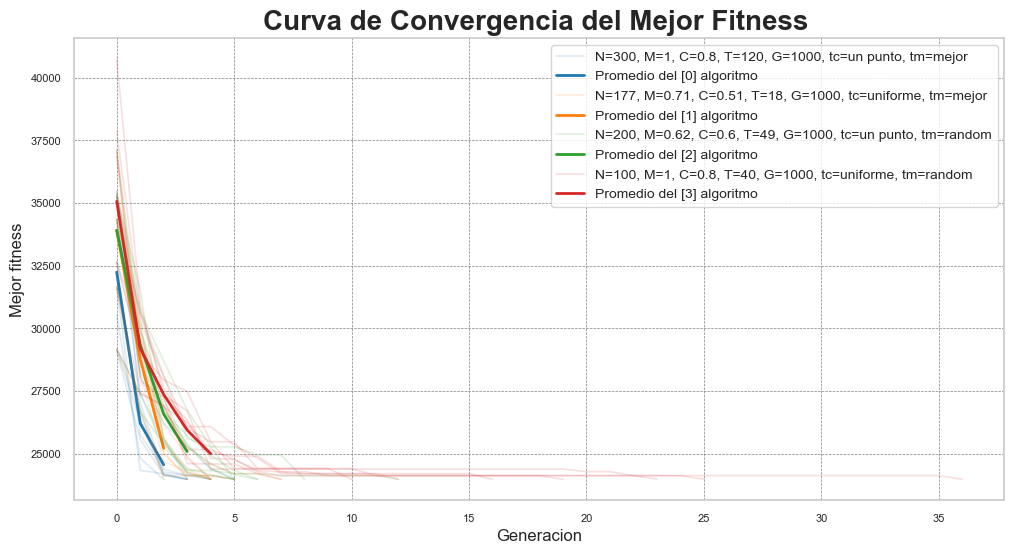

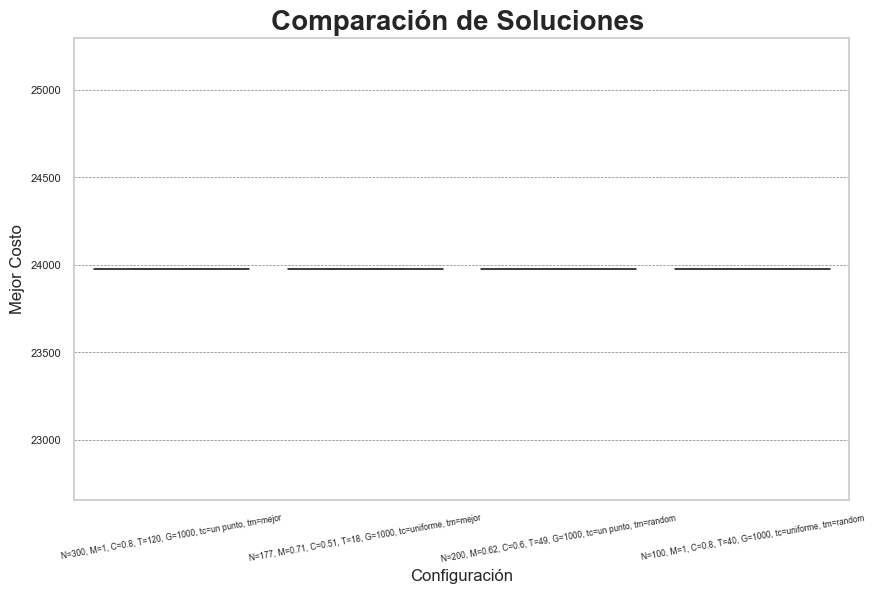

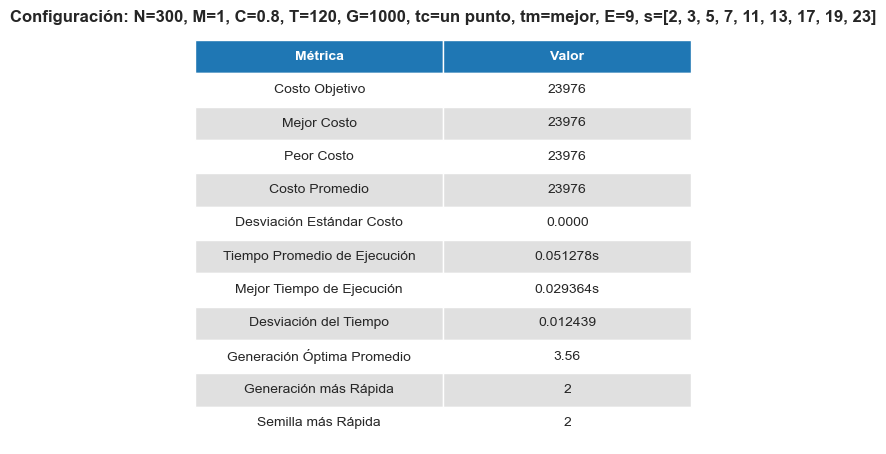

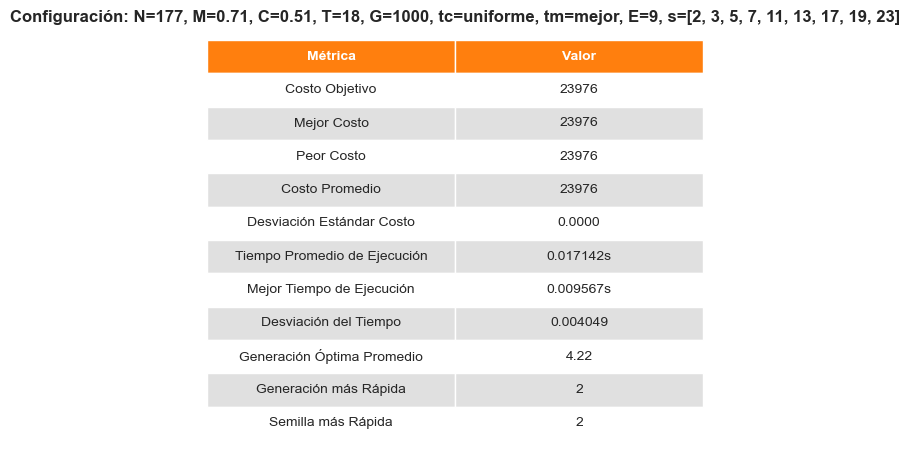

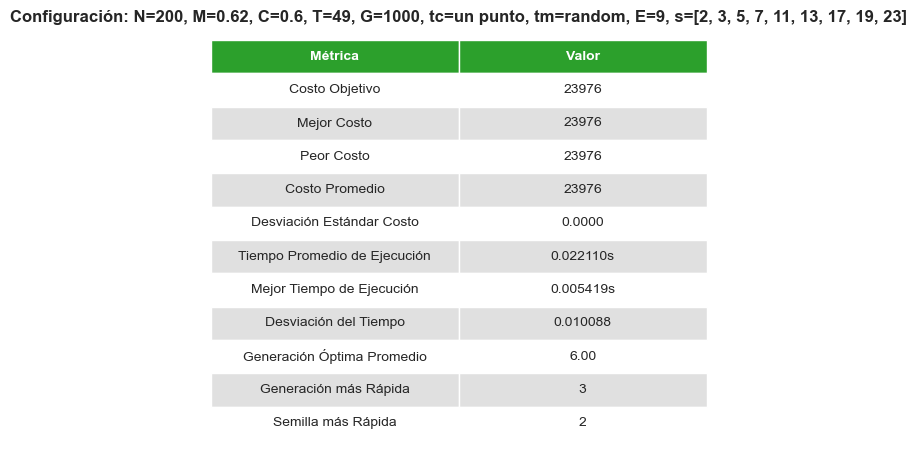

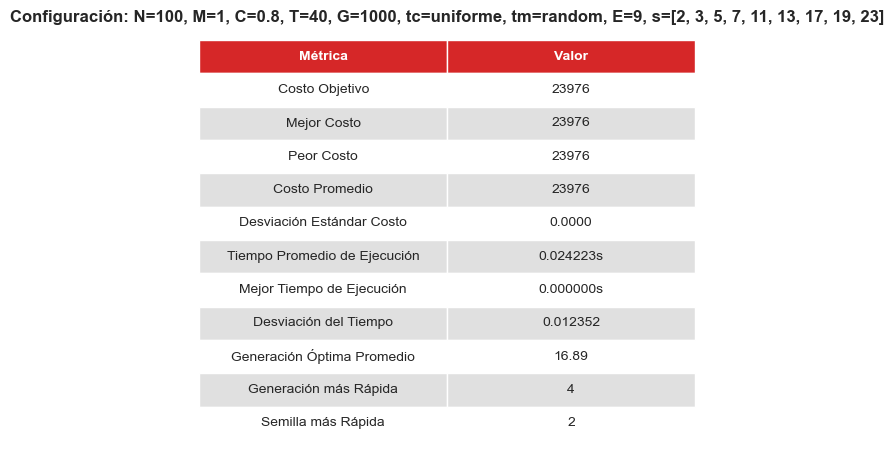

Ejecutando para UFLP-6

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=120, G=1000, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 258079, Tiempo = 22.06007s, Generación Óptima = None
Seed 3: Mejor Costo = 257968, Tiempo = 21.87403s, Generación Óptima = None
Seed 5: Mejor Costo = 258150, Tiempo = 22.12774s, Generación Óptima = None
Seed 7: Mejor Costo = 258141, Tiempo = 21.95085s, Generación Óptima = None
Seed 11: Mejor Costo = 258077, Tiempo = 21.71530s, Generación Óptima = None
Seed 13: Mejor Costo = 258085, Tiempo = 22.17468s, Generación Óptima = None
Seed 17: Mejor Costo = 258083, Tiempo = 21.93582s, Generación Óptima = None
Seed 19: Mejor Costo = 258047, Tiempo = 22.15740s, Generación Óptima = None
Seed 23: Mejor Costo = 258017, Tiempo = 22.09598s, Generación Óptima = None


--- Ejecutando configuracion: N=177, M=0.71, C=0.51, T=18, G=1000, tc=uniforme, tm=mejor ---
Seed 2: Mejor Costo = 258006, Tiempo = 7.52310s, Generación Óptima = None
Seed 3: Mejor Costo = 258027, Tiempo 

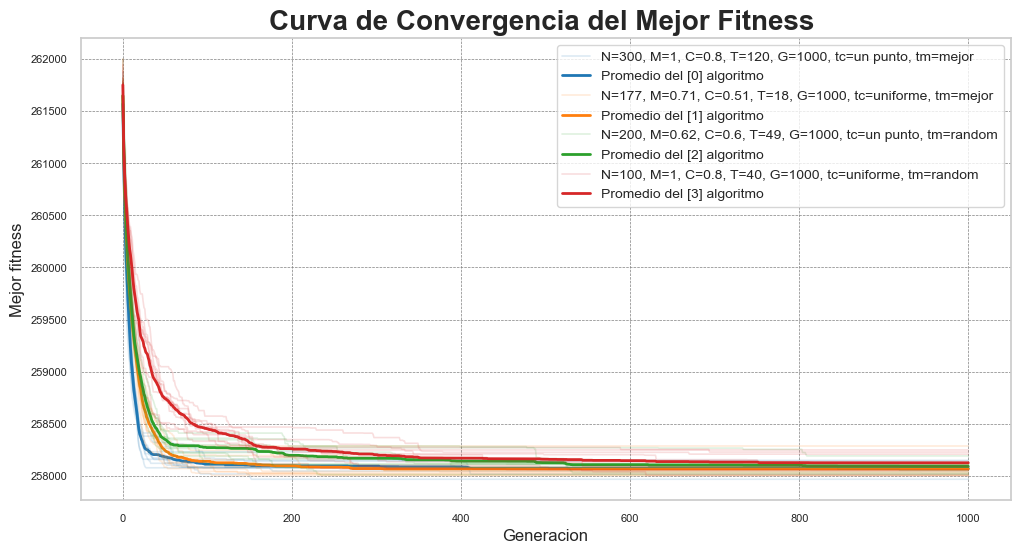

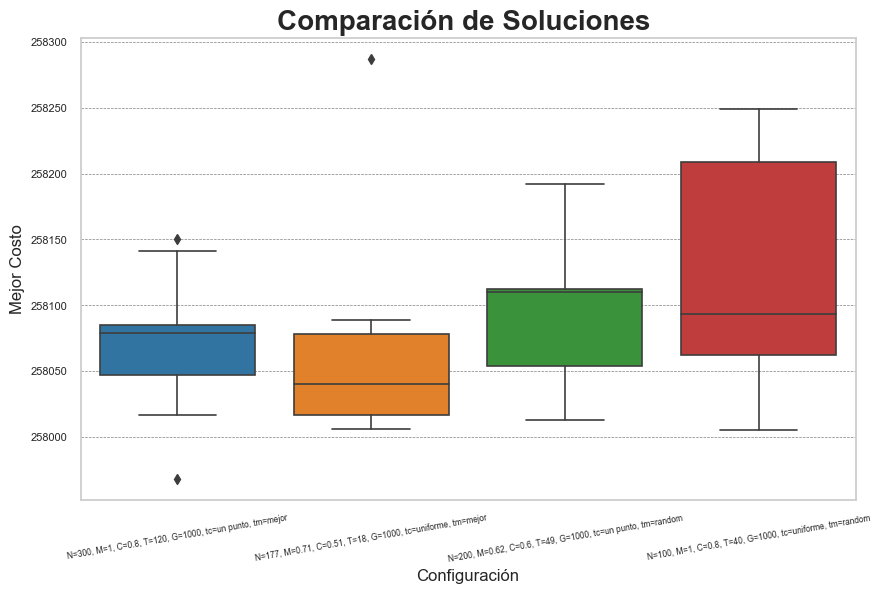

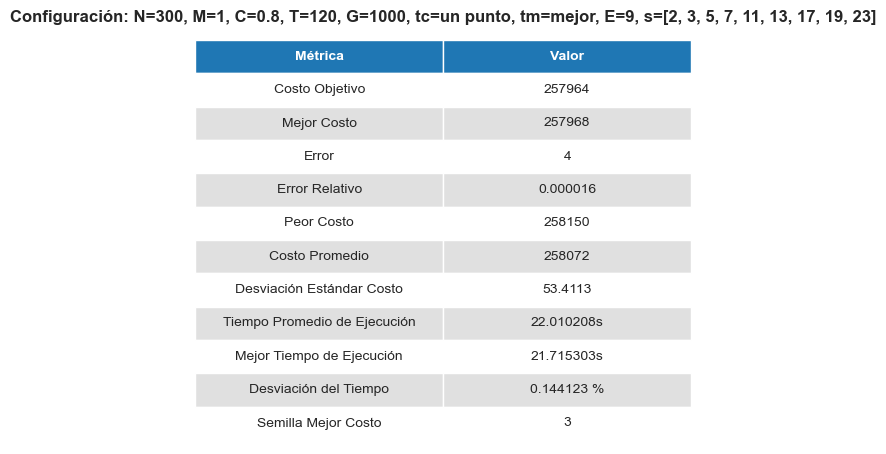

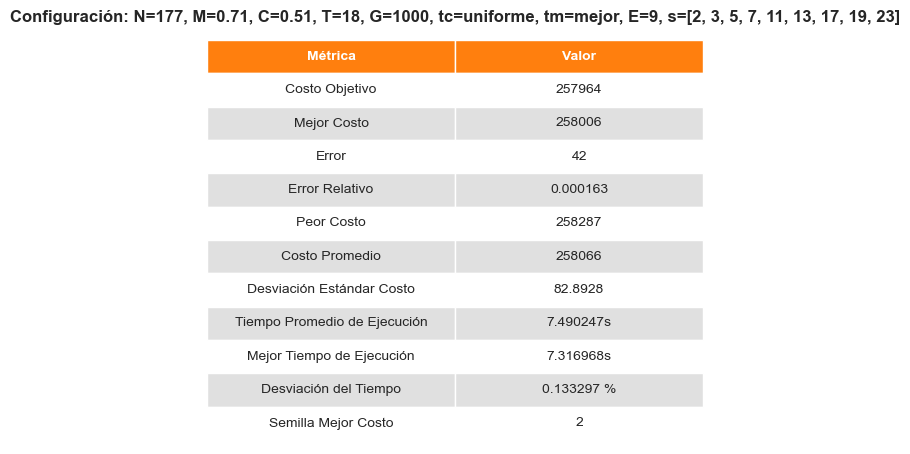

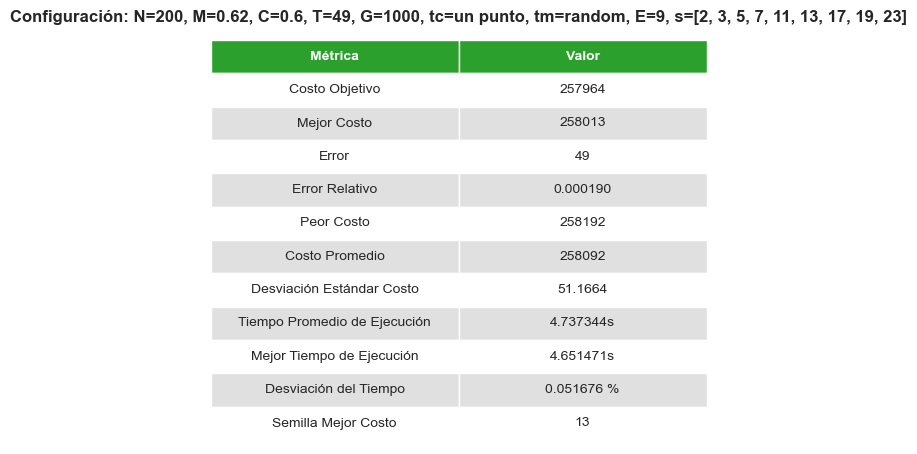

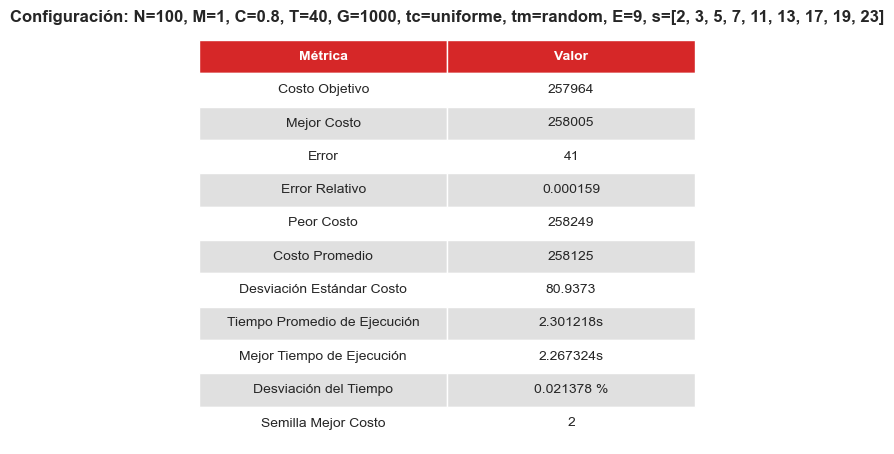

Ejecutando para UFLP-7

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=120, G=1000, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 258020, Tiempo = 21.78889s, Generación Óptima = None
Seed 3: Mejor Costo = 258128, Tiempo = 22.57176s, Generación Óptima = None
Seed 5: Mejor Costo = 258239, Tiempo = 21.87257s, Generación Óptima = None
Seed 7: Mejor Costo = 258150, Tiempo = 22.53833s, Generación Óptima = None
Seed 11: Mejor Costo = 258100, Tiempo = 21.41169s, Generación Óptima = None
Seed 13: Mejor Costo = 258143, Tiempo = 21.73006s, Generación Óptima = None
Seed 17: Mejor Costo = 258226, Tiempo = 22.49185s, Generación Óptima = None
Seed 19: Mejor Costo = 258055, Tiempo = 21.84154s, Generación Óptima = None
Seed 23: Mejor Costo = 258102, Tiempo = 22.43020s, Generación Óptima = None


--- Ejecutando configuracion: N=177, M=0.71, C=0.51, T=18, G=1000, tc=uniforme, tm=mejor ---
Seed 2: Mejor Costo = 258231, Tiempo = 7.45910s, Generación Óptima = None
Seed 3: Mejor Costo = 258081, Tiempo 

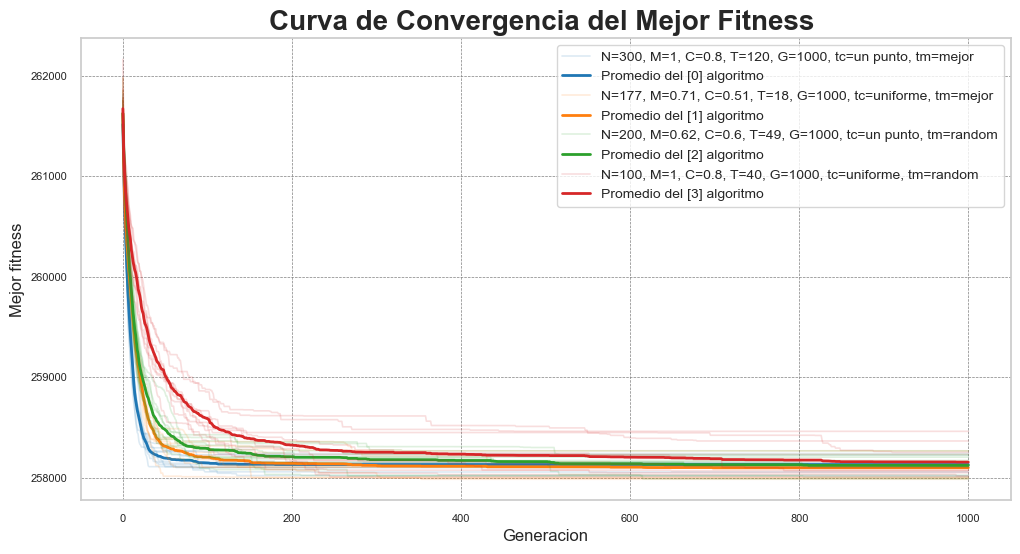

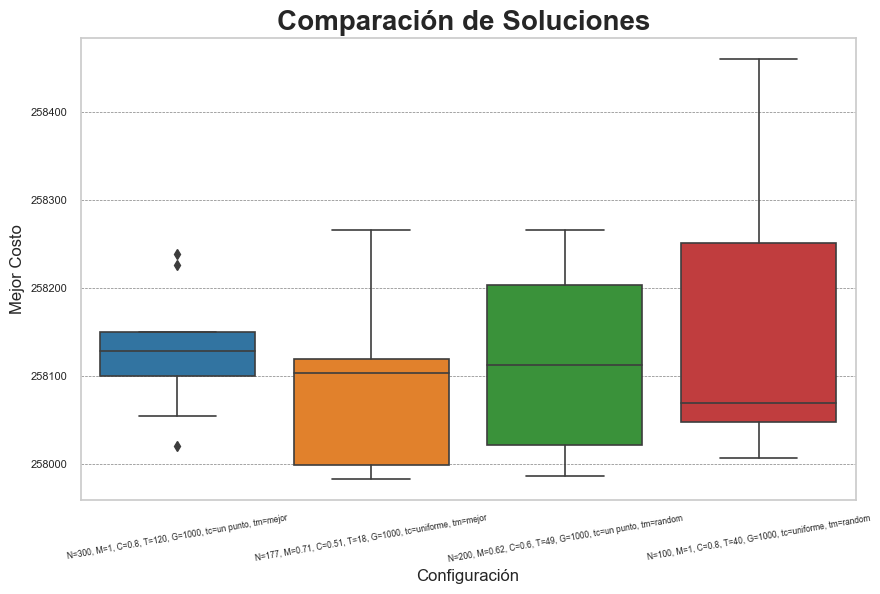

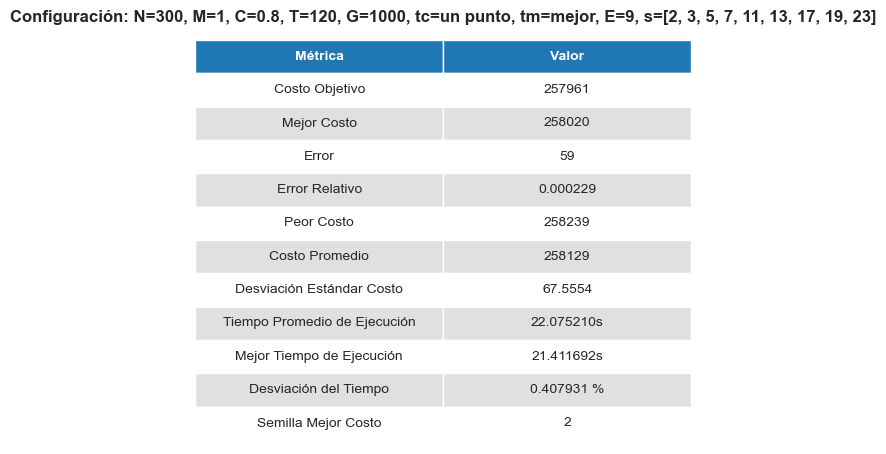

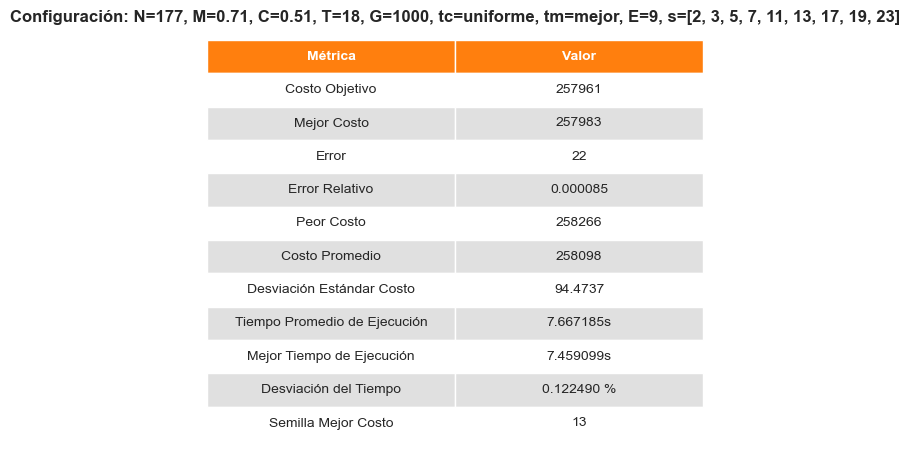

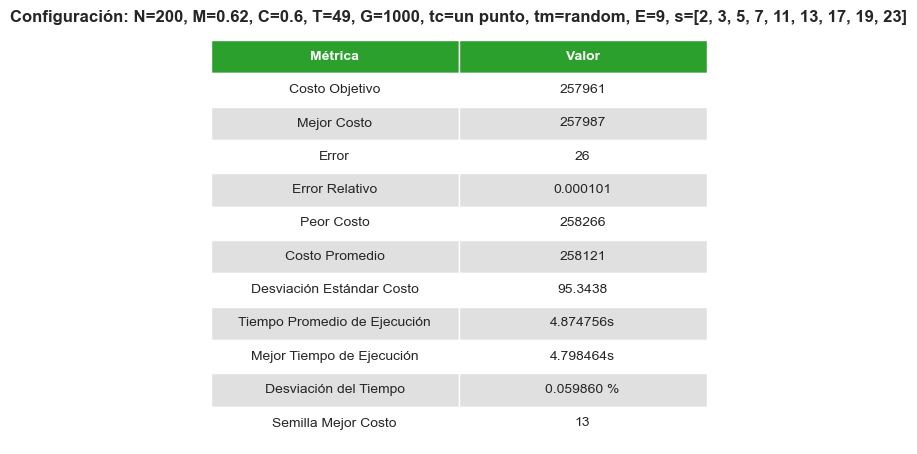

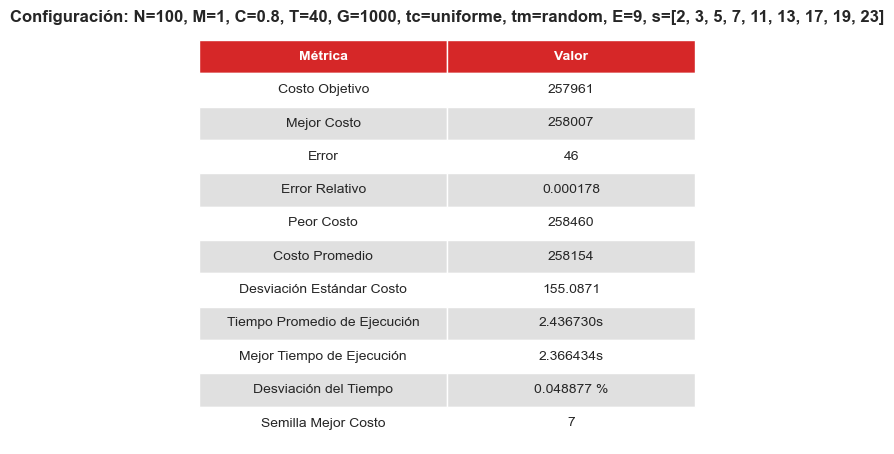

Ejecutando para UFLP-8

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=120, G=1000, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 257813, Tiempo = 22.79460s, Generación Óptima = None
Seed 3: Mejor Costo = 257815, Tiempo = 22.95935s, Generación Óptima = None
Seed 5: Mejor Costo = 257755, Tiempo = 22.29959s, Generación Óptima = None
Seed 7: Mejor Costo = 257780, Tiempo = 22.57000s, Generación Óptima = None
Seed 11: Mejor Costo = 257806, Tiempo = 22.37021s, Generación Óptima = None
Seed 13: Mejor Costo = 257759, Tiempo = 22.60264s, Generación Óptima = None
Seed 17: Mejor Costo = 257704, Tiempo = 21.98169s, Generación Óptima = None
Seed 19: Mejor Costo = 257992, Tiempo = 22.01809s, Generación Óptima = None
Seed 23: Mejor Costo = 257673, Tiempo = 22.26829s, Generación Óptima = None


--- Ejecutando configuracion: N=177, M=0.71, C=0.51, T=18, G=1000, tc=uniforme, tm=mejor ---
Seed 2: Mejor Costo = 257751, Tiempo = 7.38098s, Generación Óptima = None
Seed 3: Mejor Costo = 257753, Tiempo 

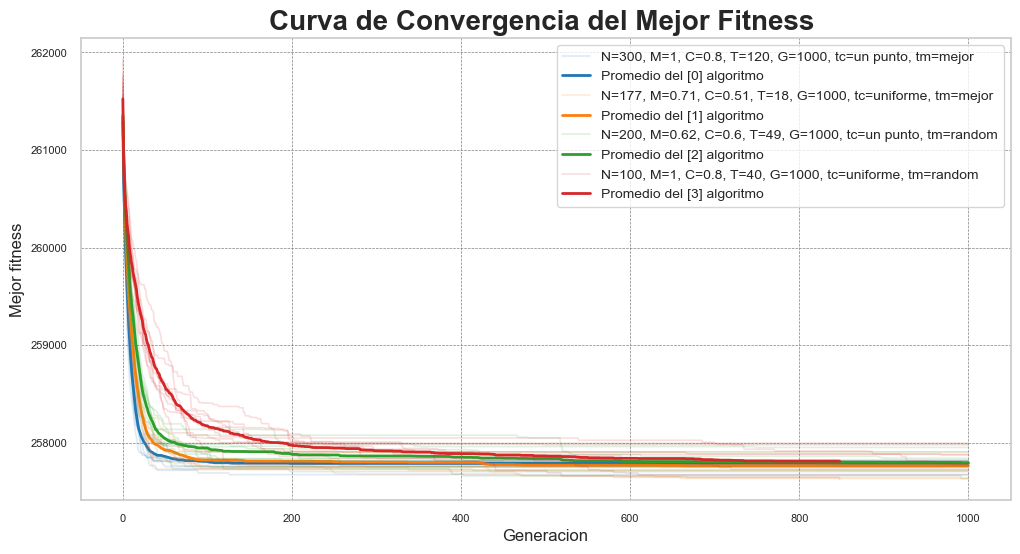

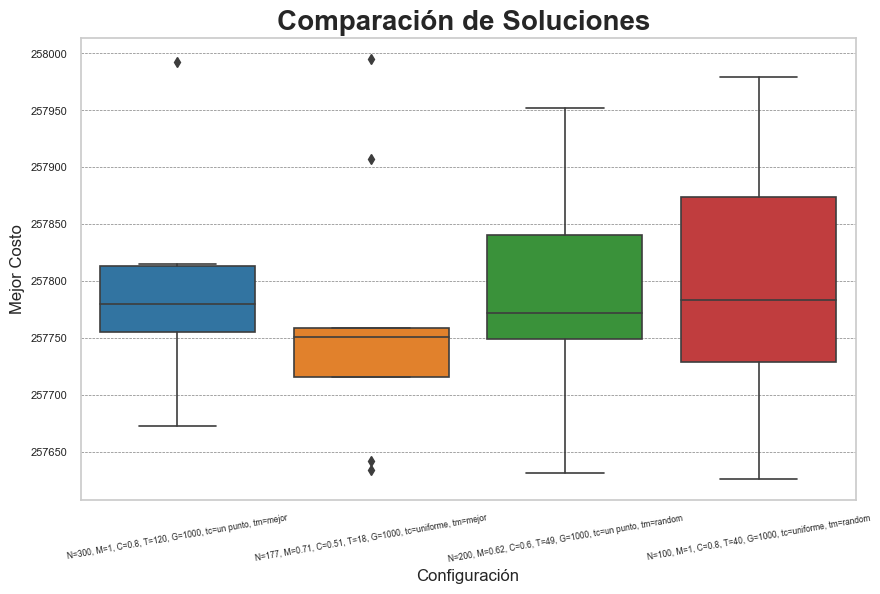

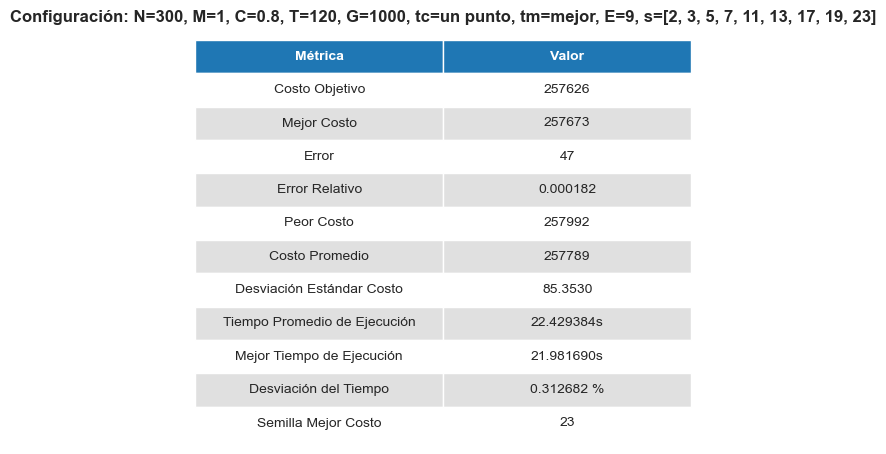

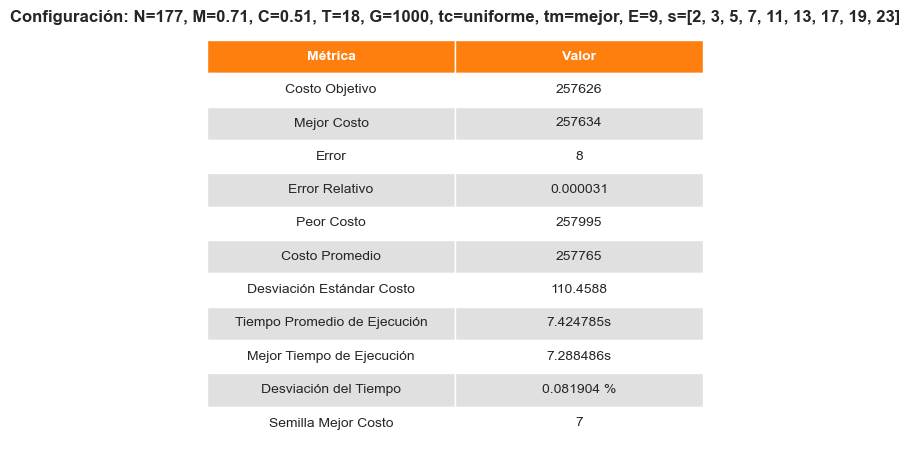

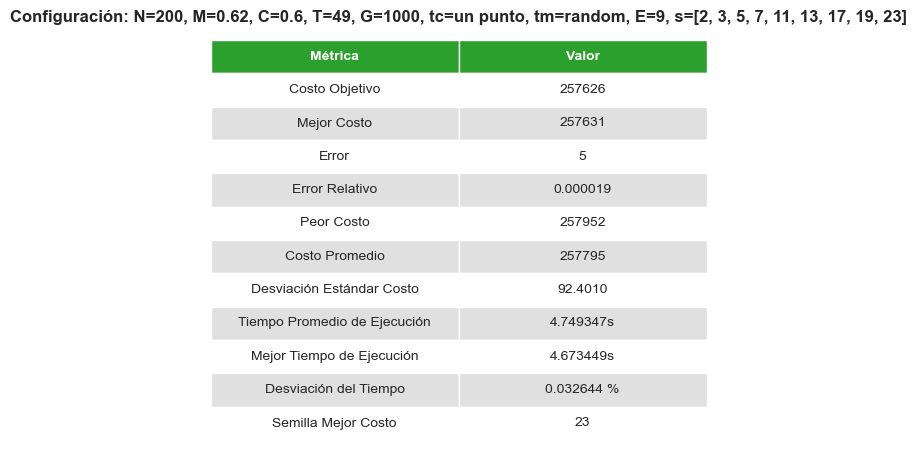

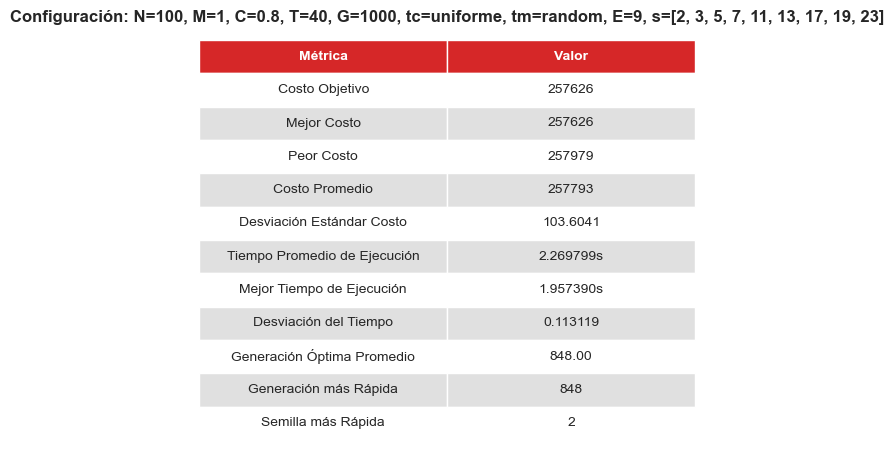

Ejecutando para UFLP-9

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=120, G=1000, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 257759, Tiempo = 22.16639s, Generación Óptima = None
Seed 3: Mejor Costo = 257610, Tiempo = 21.90668s, Generación Óptima = None
Seed 5: Mejor Costo = 257577, Tiempo = 21.93140s, Generación Óptima = None
Seed 7: Mejor Costo = 257936, Tiempo = 21.76224s, Generación Óptima = None
Seed 11: Mejor Costo = 257765, Tiempo = 21.48940s, Generación Óptima = None
Seed 13: Mejor Costo = 257748, Tiempo = 21.98533s, Generación Óptima = None
Seed 17: Mejor Costo = 257785, Tiempo = 21.33385s, Generación Óptima = None
Seed 19: Mejor Costo = 257616, Tiempo = 22.03229s, Generación Óptima = None
Seed 23: Mejor Costo = 257842, Tiempo = 22.25590s, Generación Óptima = None


--- Ejecutando configuracion: N=177, M=0.71, C=0.51, T=18, G=1000, tc=uniforme, tm=mejor ---
Seed 2: Mejor Costo = 257667, Tiempo = 7.20466s, Generación Óptima = None
Seed 3: Mejor Costo = 257876, Tiempo 

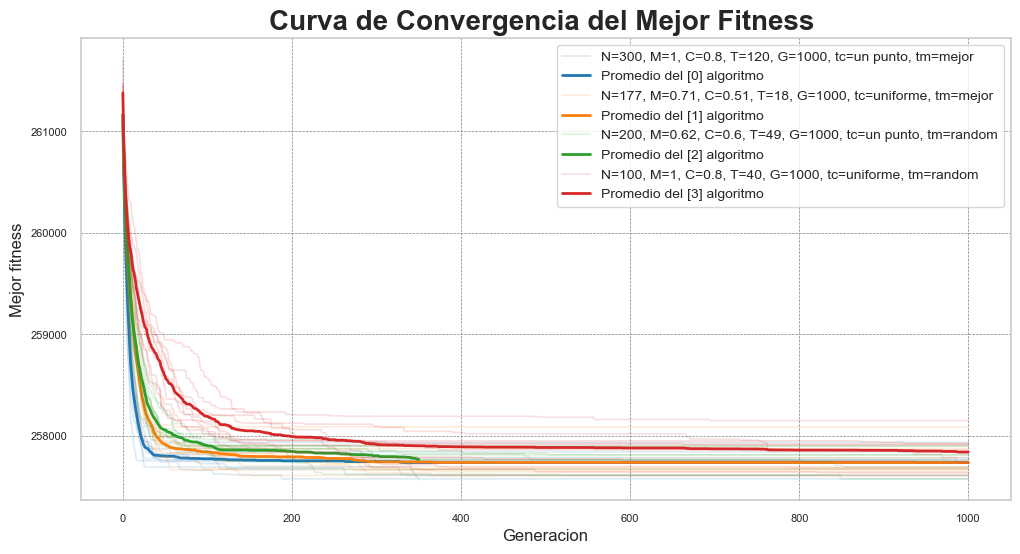

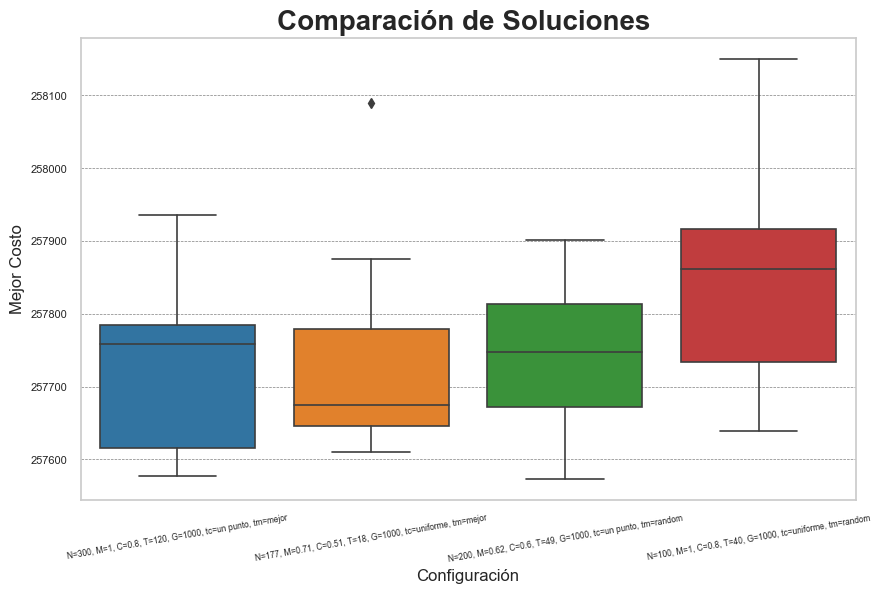

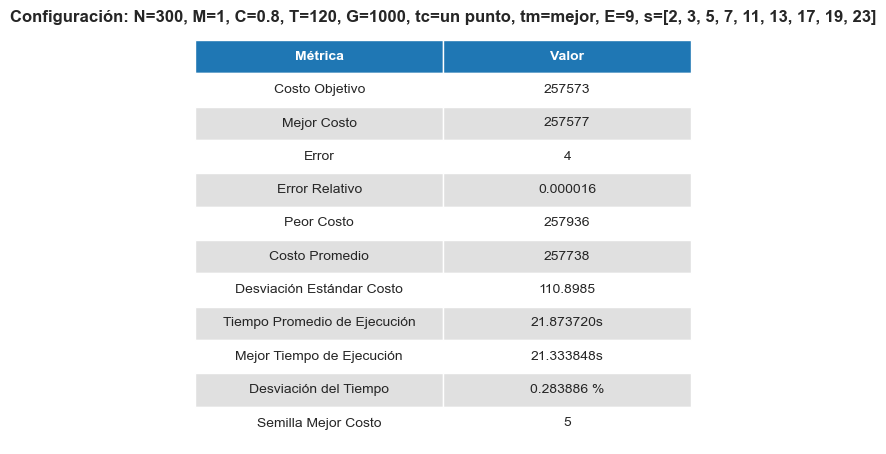

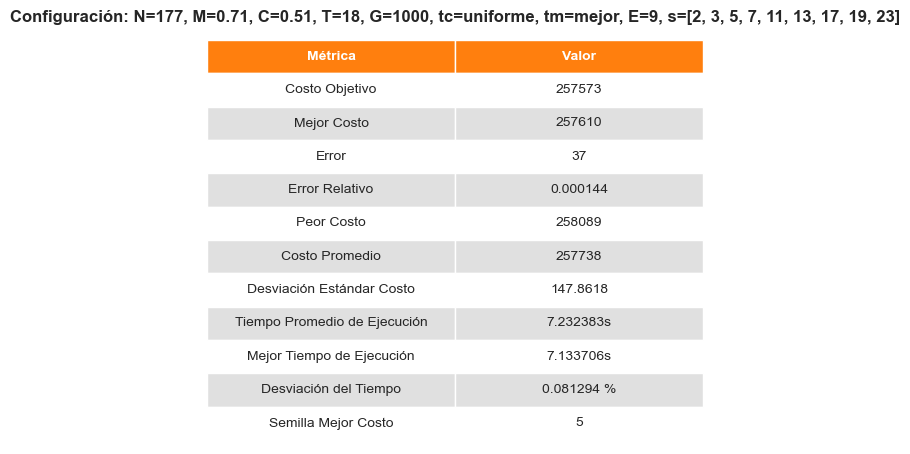

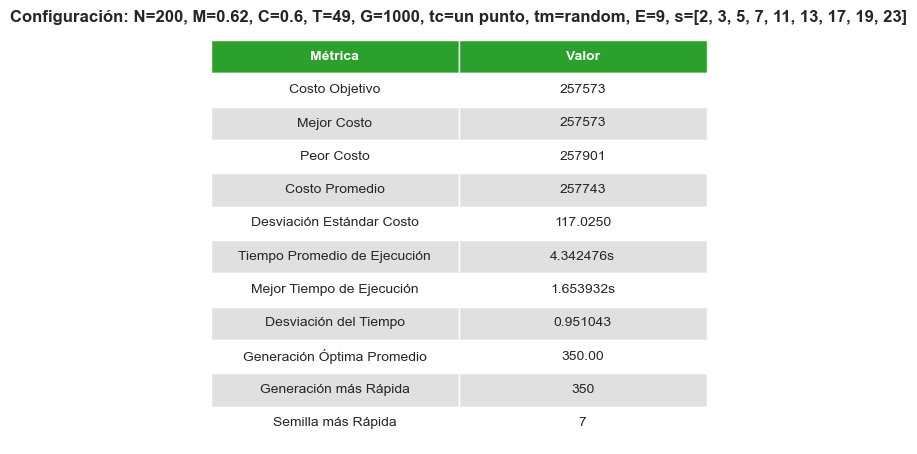

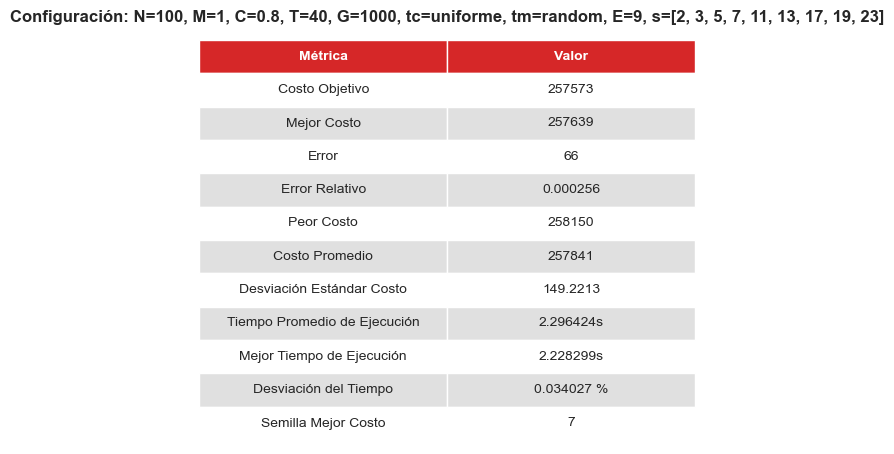

Ejecutando para UFLP-10

--- Ejecutando configuracion: N=300, M=1, C=0.8, T=120, G=1000, tc=un punto, tm=mejor ---
Seed 2: Mejor Costo = 258112, Tiempo = 22.46401s, Generación Óptima = None
Seed 3: Mejor Costo = 257905, Tiempo = 21.87298s, Generación Óptima = None
Seed 5: Mejor Costo = 258118, Tiempo = 22.65171s, Generación Óptima = None
Seed 7: Mejor Costo = 257990, Tiempo = 22.41341s, Generación Óptima = None
Seed 11: Mejor Costo = 257931, Tiempo = 22.06361s, Generación Óptima = None
Seed 13: Mejor Costo = 258073, Tiempo = 22.68176s, Generación Óptima = None
Seed 17: Mejor Costo = 258009, Tiempo = 22.18801s, Generación Óptima = None
Seed 19: Mejor Costo = 258141, Tiempo = 23.06181s, Generación Óptima = None
Seed 23: Mejor Costo = 258236, Tiempo = 22.23916s, Generación Óptima = None


--- Ejecutando configuracion: N=177, M=0.71, C=0.51, T=18, G=1000, tc=uniforme, tm=mejor ---
Seed 2: Mejor Costo = 258012, Tiempo = 7.52968s, Generación Óptima = None
Seed 3: Mejor Costo = 258158, Tiempo

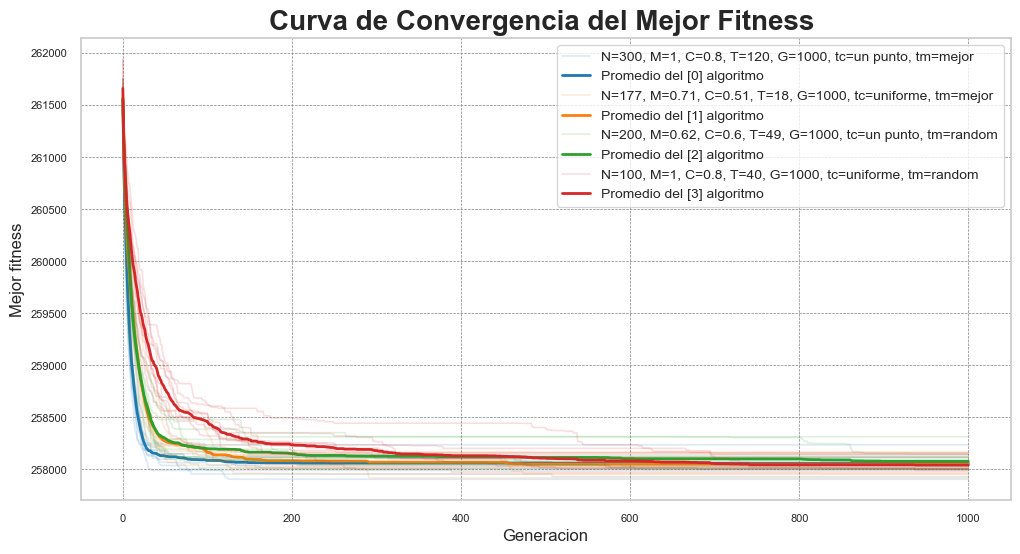

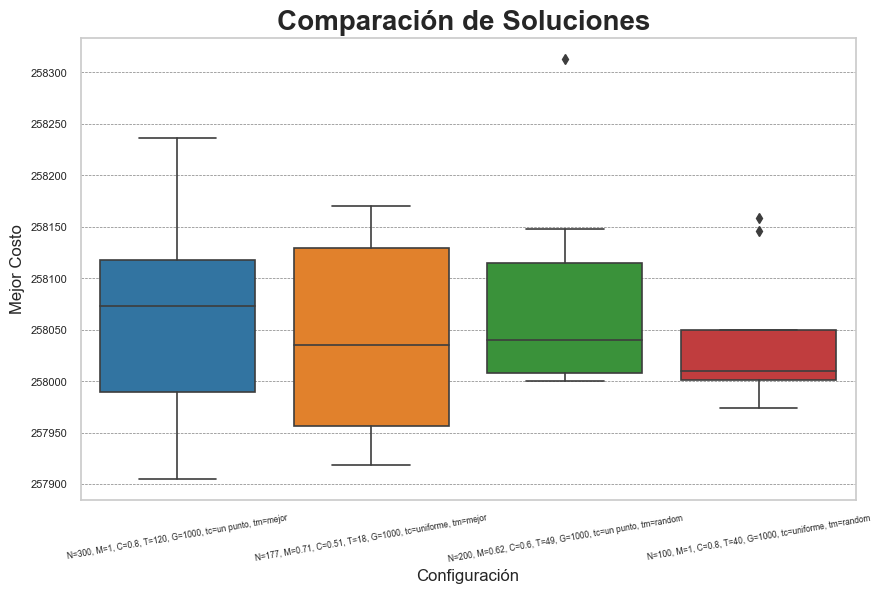

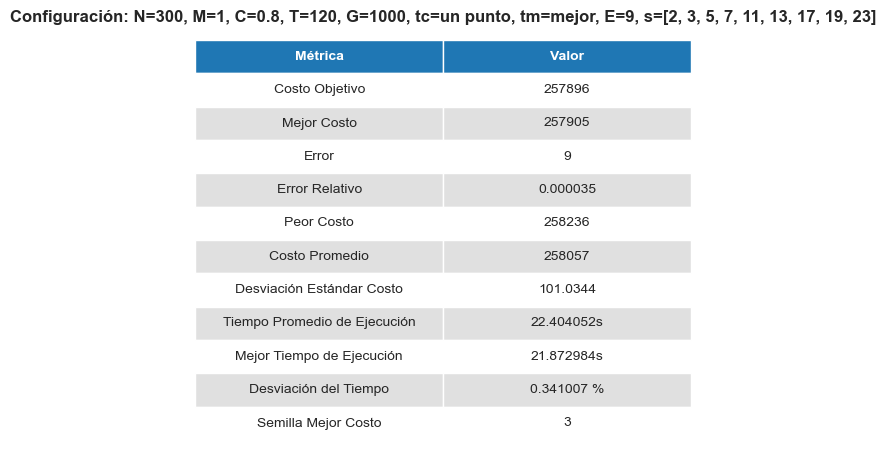

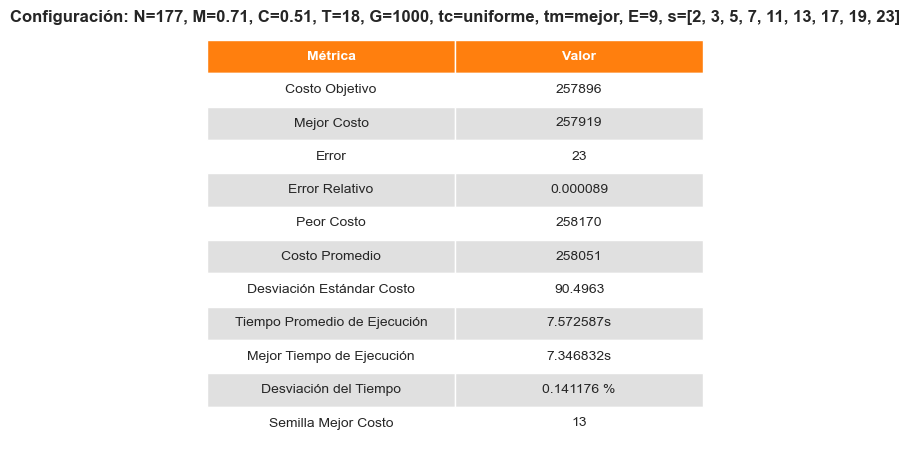

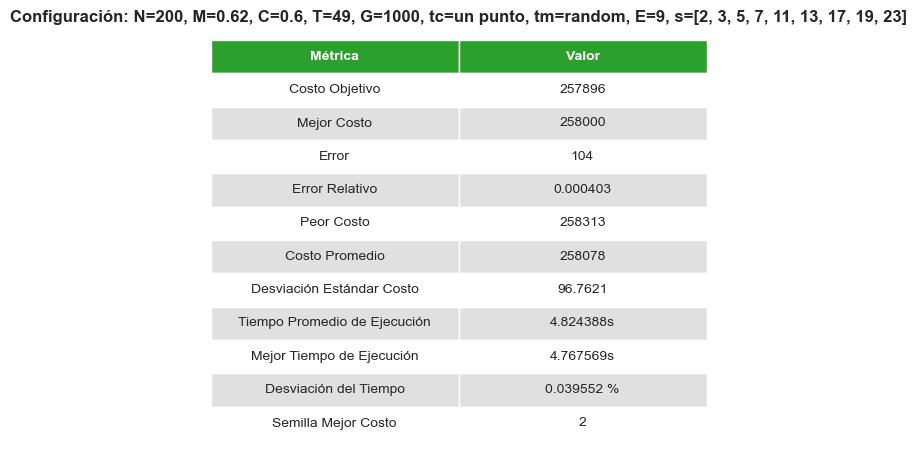

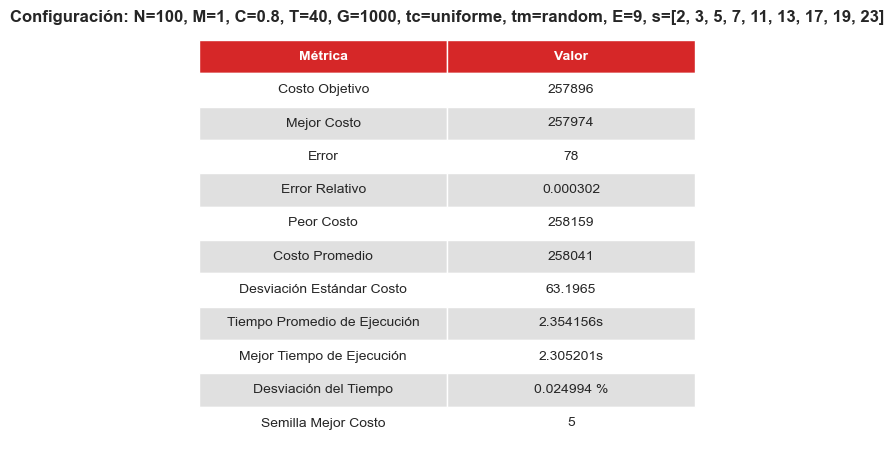

In [12]:
for i in range(1, 11):

    file_name = list(objetivos.keys())[i-1]
    fitness_objetivo = objetivos[file_name]
    os.makedirs(os.path.join(path, file_name), exist_ok=True)
    
    n_instalaciones, n_clientes, costos_fijos, costos_de_transporte = cargar_datos('datos/'+file_name+'.txt')
    
    print(f"Ejecutando para {file_name}\n")
    todo(n_instalaciones, n_clientes, costos_fijos, costos_de_transporte, fitness_objetivo, configuraciones, random_seed, path, file_name)